In  Workshop 3 you looked specifically at lexical diversity in lyrics.  
Now  with songs from two different artists or genres of your choice use the tools that you have been introduced to during the module to analyse a selection of their songs and identify similarities and differences in the style of language used.  
Do the artists or genres have defining features and would these defining features allow you to correctly guess an unseen song?  
Discuss a context where this approach to the analysis of language could apply to some other task related to your own academic background.  
What might you need to add or change to better address the task in your domain?  
Use examples to support your answer.  
You may also use other resources as long as these are cited appropriately.  

## Gather data

In [1]:
import nltk
from bs4 import BeautifulSoup
import requests
import re
from pathlib import Path

def get_songs(artistid, song_dir = "songs"):
    song_dir = Path(song_dir)
    url = f"https://genius.p.rapidapi.com/artists/{artistid}/songs"

    headers = {
        'x-rapidapi-host': "genius.p.rapidapi.com",
        'x-rapidapi-key': "8c62b01aa3msh79ca17d82d4e5dep1a3ddejsn9346cf9aa3cb"
    }

    stepsize = 50
    page = 1
    
    print(f"==>Retrieving songs for Artist ID {artistid}. Songs will be stored in `{song_dir}'")
    response = requests.request("GET", url, headers=headers, params={"sort":"title","per_page":str(stepsize),"page":str(page)})
    song_page = response.json()['response']['songs']
    songs = song_page
    while response.json()['response']['next_page']:
        response = requests.request("GET", url, headers=headers, params={"sort":"title","per_page":str(stepsize),"page":str(page)})
        song_page = response.json()['response']['songs']
        songs.extend(song_page)
        page = response.json()['response']['next_page']
    print(f"==>Retrieved {len(songs)} songs")
    print(f"====>Writing songs to file unless they already exist as a lyrics file.<====")
    nwritten = 0
    for s in songs:
        if s['primary_artist']['id'] == artistid and s['lyrics_state'] == 'complete':
            print(f"==>SONG: {s['title']} / {s['url']} <==")
            path = song_dir.joinpath(f"{s['primary_artist']['name']}_{s['title'].replace('/','')}.song")
            if not path.is_file():
                soup = BeautifulSoup(requests.get(s['url']).content, 'html.parser')
                lyrics_tag = soup.find('div', class_='lyrics')
                if lyrics_tag is not None:
                    lyrics = lyrics_tag.get_text()
                    print(f">WRITING LYRICS [ {s['primary_artist']['name']} / {s['title']} ] to `{path}'")
                    f = open(path, "w")
                    f.write(lyrics)
                    f.close()
                    nwritten = nwritten+1
            else:
                print(f">Found {path}")
    print(f"====>Finished writing songs to files. Wrote {nwritten} songs.<====\n")
    return songs

In [2]:
jcsongs = get_songs(1167)
kcsongs = get_songs(14986)

==>Retrieving songs for Artist ID 1167. Songs will be stored in `songs'
==>Retrieved 1214 songs
====>Writing songs to file unless they already exist as a lyrics file.<====
==>SONG: 1 Corinthians 15:55 / https://genius.com/Johnny-cash-1-corinthians-15-55-lyrics <==
>Found songs/Johnny Cash_1 Corinthians 15:55.song
==>SONG: 25 Minutes to Go / https://genius.com/Johnny-cash-25-minutes-to-go-lyrics <==
>Found songs/Johnny Cash_25 Minutes to Go.song
==>SONG: 25 Minutes to Go (2012) / https://genius.com/Johnny-cash-25-minutes-to-go-2012-lyrics <==
>Found songs/Johnny Cash_25 Minutes to Go (2012).song
==>SONG: 40 Shades of Green / https://genius.com/Johnny-cash-40-shades-of-green-lyrics <==
>Found songs/Johnny Cash_40 Shades of Green.song
==>SONG: Abner Brown / https://genius.com/Johnny-cash-abner-brown-lyrics <==
>Found songs/Johnny Cash_Abner Brown.song
==>SONG: A Boy Named Sue / https://genius.com/Johnny-cash-a-boy-named-sue-lyrics <==
>Found songs/Johnny Cash_A Boy Named Sue.song
==>SONG:

>Found songs/Johnny Cash_Ridin’ on the Cotton Belt.song
==>SONG: Ringing the Bells for Jim / https://genius.com/Johnny-cash-ringing-the-bells-for-jim-lyrics <==
>Found songs/Johnny Cash_Ringing the Bells for Jim.song
==>SONG: Ring of Fire / https://genius.com/Johnny-cash-ring-of-fire-lyrics <==
>Found songs/Johnny Cash_Ring of Fire.song
==>SONG: Ring of Fire (live) / https://genius.com/Johnny-cash-ring-of-fire-live-lyrics <==
>Found songs/Johnny Cash_Ring of Fire (live).song
==>SONG: Rockabilly Blues / https://genius.com/Johnny-cash-rockabilly-blues-lyrics <==
>Found songs/Johnny Cash_Rockabilly Blues.song
==>SONG: Rockabilly Blues (Texas 1955) / https://genius.com/Johnny-cash-rockabilly-blues-texas-1955-lyrics <==
>Found songs/Johnny Cash_Rockabilly Blues (Texas 1955).song
==>SONG: Rock And Roll Ruby / https://genius.com/Johnny-cash-rock-and-roll-ruby-lyrics <==
>Found songs/Johnny Cash_Rock And Roll Ruby.song
==>SONG: Rock and Roll Shoes / https://genius.com/Johnny-cash-rock-and-roll

==>Retrieved 214 songs
====>Writing songs to file unless they already exist as a lyrics file.<====
==>SONG: 21st Century Schizoid Man / https://genius.com/King-crimson-21st-century-schizoid-man-lyrics <==
>Found songs/King Crimson_21st Century Schizoid Man.song
==>SONG: 21st Century Schizoid Man (BBC session) / https://genius.com/King-crimson-21st-century-schizoid-man-bbc-session-lyrics <==
>Found songs/King Crimson_21st Century Schizoid Man (BBC session).song
==>SONG: 21st Century Schizoid Man - Commentary / https://genius.com/King-crimson-21st-century-schizoid-man-commentary-lyrics <==
>Found songs/King Crimson_21st Century Schizoid Man - Commentary.song
==>SONG: 21st Century Schizoid Man (Fillmore East) / https://genius.com/King-crimson-21st-century-schizoid-man-fillmore-east-lyrics <==
>Found songs/King Crimson_21st Century Schizoid Man (Fillmore East).song
==>SONG: 21st Century Schizoid Man (Hyde Park) / https://genius.com/King-crimson-21st-century-schizoid-man-hyde-park-lyrics <=

In [101]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["verse","chorus","instrumental","1","2","3"])
punctuation = [",",".",";","'","-","I","\"","!","--",".\"","?","'s", "''", "..."]
from pathlib import Path
import re
import nltk

class Song(object):    
    def __init__(self, title, artist):
        self._title = title
        self._artist = artist
        path = self.filename_fmt(self._artist, self._title)
        print(f"SONG: {self._title} / {self._artist} / {path}")
        self._file = open(path, "r")
        self.words = nltk.word_tokenize(self._file.read())
            
    @classmethod
    def from_file(cls, filename):
        m = re.match(r"([^_]+)(?:_)([^_]+)(?:\.song)", filename)
        g = m.groups()
        return cls(g[1], g[0])
        
    def filtered(self): # Fadhbanna le m.s. ``don't``, ``can't``, gearrtearmaí eile
        return [t.lower() for t in self.words if t.isalnum() and (t.lower() not in stop_words) and (t not in punctuation)]
    
    def freq_dist(self):
        return nltk.FreqDist(self.filtered())
    
    @staticmethod
    def filename_fmt(artist, title = None,):
        titlestr = str(title) if title is not None else "*"
        return Path(f"{artist}_{titlestr}.song")
    
class Artist(object):
    def __init__(self, name, song_dir = 'songs'):
        self.name = name
        p = Path(song_dir)
        self.songs = [Song.from_file(str(n)) for n in p.glob(str(Song.filename_fmt(self.name)))]

In [102]:
artists = ["King Crimson", "Johnny Cash"]
aa = [Artist(a) for a in artists]

SONG: Free as a Bird / songs/King Crimson / songs/King Crimson_Free as a Bird.song
SONG: Walk On...No Pussyfooting / songs/King Crimson / songs/King Crimson_Walk On...No Pussyfooting.song
SONG: Exiles / songs/King Crimson / songs/King Crimson_Exiles.song
SONG: The Power to Believe III / songs/King Crimson / songs/King Crimson_The Power to Believe III.song
SONG: Larks’ Tongues in Aspic, Pt. 4 / songs/King Crimson / songs/King Crimson_Larks’ Tongues in Aspic, Pt. 4.song
SONG: Walk On - Monk Morph Music of the Chamber / songs/King Crimson / songs/King Crimson_Walk On - Monk Morph Music of the Chamber.song
SONG: The Sheltering Sky / songs/King Crimson / songs/King Crimson_The Sheltering Sky.song
SONG: Happy Family / songs/King Crimson / songs/King Crimson_Happy Family.song
SONG: Meltdown / songs/King Crimson / songs/King Crimson_Meltdown.song
SONG: Lady of the Dancing Water / songs/King Crimson / songs/King Crimson_Lady of the Dancing Water.song
SONG: The King Crimson Barber Shop / songs/K

SONG: Moonchild / songs/King Crimson / songs/King Crimson_Moonchild.song
SONG: Peace – An End / songs/King Crimson / songs/King Crimson_Peace – An End.song
SONG: Cirkus / songs/King Crimson / songs/King Crimson_Cirkus.song
SONG: Earthbound / songs/King Crimson / songs/King Crimson_Earthbound.song
SONG: When I Say Stop, Continue / songs/King Crimson / songs/King Crimson_When I Say Stop, Continue.song
SONG: Islands / songs/King Crimson / songs/King Crimson_Islands.song
SONG: Requiem / songs/King Crimson / songs/King Crimson_Requiem.song
SONG: Sleepless / songs/King Crimson / songs/King Crimson_Sleepless.song
SONG: I Talk To The Wind / songs/King Crimson / songs/King Crimson_I Talk To The Wind.song
SONG: Three of a Perfect Pair / songs/King Crimson / songs/King Crimson_Three of a Perfect Pair.song
SONG: Neal and Jack and Me / songs/King Crimson / songs/King Crimson_Neal and Jack and Me.song
SONG: Inner Garden II / songs/King Crimson / songs/King Crimson_Inner Garden II.song
SONG: Drink To

SONG: I Do Believe / songs/Johnny Cash / songs/Johnny Cash_I Do Believe.song
SONG: Hit The Road And Go / songs/Johnny Cash / songs/Johnny Cash_Hit The Road And Go.song
SONG: The General Lee / songs/Johnny Cash / songs/Johnny Cash_The General Lee.song
SONG: Softly and Tenderly / songs/Johnny Cash / songs/Johnny Cash_Softly and Tenderly.song
SONG: City Of New Orleans / songs/Johnny Cash / songs/Johnny Cash_City Of New Orleans.song
SONG: For Lovin’ Me / songs/Johnny Cash / songs/Johnny Cash_For Lovin’ Me.song
SONG: The miracle man / songs/Johnny Cash / songs/Johnny Cash_The miracle man.song
SONG: Daddy / songs/Johnny Cash / songs/Johnny Cash_Daddy.song
SONG: I Saw a Man / songs/Johnny Cash / songs/Johnny Cash_I Saw a Man.song
SONG: From Sea to Shining Sea / songs/Johnny Cash / songs/Johnny Cash_From Sea to Shining Sea.song
SONG: Straight A’s In Love / songs/Johnny Cash / songs/Johnny Cash_Straight A’s In Love.song
SONG: Casey’s Last Ride / songs/Johnny Cash / songs/Johnny Cash_Casey’s Las

SONG: Merry Christmas Mary / songs/Johnny Cash / songs/Johnny Cash_Merry Christmas Mary.song
SONG: The Man Who Couldn’t Cry / songs/Johnny Cash / songs/Johnny Cash_The Man Who Couldn’t Cry.song
SONG: Mobile Bay / songs/Johnny Cash / songs/Johnny Cash_Mobile Bay.song
SONG: Doin’ My Time (The Heavy remix) / songs/Johnny Cash / songs/Johnny Cash_Doin’ My Time (The Heavy remix).song
SONG: Missouri Waltz / songs/Johnny Cash / songs/Johnny Cash_Missouri Waltz.song
SONG: Cindy / songs/Johnny Cash / songs/Johnny Cash_Cindy.song
SONG: On The Via Dolorosa / songs/Johnny Cash / songs/Johnny Cash_On The Via Dolorosa.song
SONG: Do Lord / songs/Johnny Cash / songs/Johnny Cash_Do Lord.song
SONG: Let the Lower Lights Be Burning / songs/Johnny Cash / songs/Johnny Cash_Let the Lower Lights Be Burning.song
SONG: The Cremation of Sam McGee / songs/Johnny Cash / songs/Johnny Cash_The Cremation of Sam McGee.song
SONG: It Could Be You (Instead Of Him) / songs/Johnny Cash / songs/Johnny Cash_It Could Be You (

SONG: Orleans Parish Prison (live) / songs/Johnny Cash / songs/Johnny Cash_Orleans Parish Prison (live).song
SONG: Like a Soldier (Alternate Take) / songs/Johnny Cash / songs/Johnny Cash_Like a Soldier (Alternate Take).song
SONG: Wildwood Flower / songs/Johnny Cash / songs/Johnny Cash_Wildwood Flower.song
SONG: Hard Times Come Again No More / songs/Johnny Cash / songs/Johnny Cash_Hard Times Come Again No More.song
SONG: Drive On / songs/Johnny Cash / songs/Johnny Cash_Drive On.song
SONG: The Long Black Veil / songs/Johnny Cash / songs/Johnny Cash_The Long Black Veil.song
SONG: Bandana / songs/Johnny Cash / songs/Johnny Cash_Bandana.song
SONG: The Good Earth / songs/Johnny Cash / songs/Johnny Cash_The Good Earth.song
SONG: Mean as Hell / songs/Johnny Cash / songs/Johnny Cash_Mean as Hell.song
SONG: Reaching For The Stars / songs/Johnny Cash / songs/Johnny Cash_Reaching For The Stars.song
SONG: My Two Timin’ Woman / songs/Johnny Cash / songs/Johnny Cash_My Two Timin’ Woman.song
SONG: Sag

SONG: Cotton Fields (The Cotton Song) / songs/Johnny Cash / songs/Johnny Cash_Cotton Fields (The Cotton Song).song
SONG: (I’m Proud) The Baby Is Mine / songs/Johnny Cash / songs/Johnny Cash_(I’m Proud) The Baby Is Mine.song
SONG: Stampede (Alternate Instrumental) / songs/Johnny Cash / songs/Johnny Cash_Stampede (Alternate Instrumental).song
SONG: When He Reached Down His Hand for Me / songs/Johnny Cash / songs/Johnny Cash_When He Reached Down His Hand for Me.song
SONG: When It’s Springtime in Alaska (It’s Forty Below) / songs/Johnny Cash / songs/Johnny Cash_When It’s Springtime in Alaska (It’s Forty Below).song
SONG: What Child Is This / songs/Johnny Cash / songs/Johnny Cash_What Child Is This.song
SONG: Blue Christmas / songs/Johnny Cash / songs/Johnny Cash_Blue Christmas.song
SONG: The Beast in Me / songs/Johnny Cash / songs/Johnny Cash_The Beast in Me.song
SONG: Cisco Clifton’s Filling Station / songs/Johnny Cash / songs/Johnny Cash_Cisco Clifton’s Filling Station.song
SONG: What Is

SONG: Beautiful Words / songs/Johnny Cash / songs/Johnny Cash_Beautiful Words.song
SONG: Song For The Life / songs/Johnny Cash / songs/Johnny Cash_Song For The Life.song
SONG: Walking The Blues / songs/Johnny Cash / songs/Johnny Cash_Walking The Blues.song
SONG: Pick a bale of cotton / songs/Johnny Cash / songs/Johnny Cash_Pick a bale of cotton.song
SONG: You and Tennessee / songs/Johnny Cash / songs/Johnny Cash_You and Tennessee.song
SONG: What Have You Got Planned Tonight Diana / songs/Johnny Cash / songs/Johnny Cash_What Have You Got Planned Tonight Diana.song
SONG: Kneeling Drunkards Plea / songs/Johnny Cash / songs/Johnny Cash_Kneeling Drunkards Plea.song
SONG: Figgy Pudding / songs/Johnny Cash / songs/Johnny Cash_Figgy Pudding.song
SONG: Ringing the Bells for Jim / songs/Johnny Cash / songs/Johnny Cash_Ringing the Bells for Jim.song
SONG: Destination Victoria Station / songs/Johnny Cash / songs/Johnny Cash_Destination Victoria Station.song
SONG: The Junkie And The Juicehead (Minu

SONG: Farther Along / songs/Johnny Cash / songs/Johnny Cash_Farther Along.song
SONG: When I Look / songs/Johnny Cash / songs/Johnny Cash_When I Look.song
SONG: The Walls of a Prison / songs/Johnny Cash / songs/Johnny Cash_The Walls of a Prison.song
SONG: New Mexico / songs/Johnny Cash / songs/Johnny Cash_New Mexico.song
SONG: Another Wide River To Cross / songs/Johnny Cash / songs/Johnny Cash_Another Wide River To Cross.song
SONG: Help Me Make It Through The Night / songs/Johnny Cash / songs/Johnny Cash_Help Me Make It Through The Night.song
SONG: The Fourth Man / songs/Johnny Cash / songs/Johnny Cash_The Fourth Man.song
SONG: Forever Young / songs/Johnny Cash / songs/Johnny Cash_Forever Young.song
SONG: A Proud Land / songs/Johnny Cash / songs/Johnny Cash_A Proud Land.song
SONG: Silent Night, Holy Night / songs/Johnny Cash / songs/Johnny Cash_Silent Night, Holy Night.song
SONG: The Shifting Whispering Sands, Part II / songs/Johnny Cash / songs/Johnny Cash_The Shifting Whispering Sands

SONG: The Vanishing Race / songs/Johnny Cash / songs/Johnny Cash_The Vanishing Race.song
SONG: No Charge / songs/Johnny Cash / songs/Johnny Cash_No Charge.song
SONG: Darlin’ Companion / songs/Johnny Cash / songs/Johnny Cash_Darlin’ Companion.song
SONG: I’m a newborn man / songs/Johnny Cash / songs/Johnny Cash_I’m a newborn man.song
SONG: You Remembered Me / songs/Johnny Cash / songs/Johnny Cash_You Remembered Me.song
SONG: Always Alone / songs/Johnny Cash / songs/Johnny Cash_Always Alone.song
SONG: Rock And Roll Ruby / songs/Johnny Cash / songs/Johnny Cash_Rock And Roll Ruby.song
SONG: I Dreamed About Mama Last Night / songs/Johnny Cash / songs/Johnny Cash_I Dreamed About Mama Last Night.song
SONG: If We Never Meet Again This Side of Heaven / songs/Johnny Cash / songs/Johnny Cash_If We Never Meet Again This Side of Heaven.song
SONG: Why Do You Punish Me (For Loving You) / songs/Johnny Cash / songs/Johnny Cash_Why Do You Punish Me (For Loving You).song
SONG: Life Of A Prisoner / songs/J

SONG: Children Go Where I Send Thee / songs/Johnny Cash / songs/Johnny Cash_Children Go Where I Send Thee.song
SONG: Jacob Green (live) / songs/Johnny Cash / songs/Johnny Cash_Jacob Green (live).song
SONG: Adios Aloha / songs/Johnny Cash / songs/Johnny Cash_Adios Aloha.song
SONG: Dear Mrs / songs/Johnny Cash / songs/Johnny Cash_Dear Mrs.song
SONG: You Can’t Beat Jesus Christ / songs/Johnny Cash / songs/Johnny Cash_You Can’t Beat Jesus Christ.song
SONG: Five Minutes To Live / songs/Johnny Cash / songs/Johnny Cash_Five Minutes To Live.song
SONG: Paul Revere / songs/Johnny Cash / songs/Johnny Cash_Paul Revere.song
SONG: That’s What It’s Like To Be Lonesome / songs/Johnny Cash / songs/Johnny Cash_That’s What It’s Like To Be Lonesome.song
SONG: Mama’s Baby / songs/Johnny Cash / songs/Johnny Cash_Mama’s Baby.song
SONG: (DUPE) / songs/Johnny Cash / songs/Johnny Cash_(DUPE).song
SONG: Louisiana Man / songs/Johnny Cash / songs/Johnny Cash_Louisiana Man.song
SONG: Lately / songs/Johnny Cash / so

## Identify similarities and differences in the style of language used

### Entire bodies of work

#### Generate aggregated bodies of work

In [103]:
artist_bow = [None] * len(aa)
for i,a in enumerate(aa):
    words = []
    for s in a.songs:
        words.extend(s.filtered())
    artist_bow[i] = words

In [138]:
# Changing plot sizes
# TODO: Make this work
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

#### Frequency Distribution

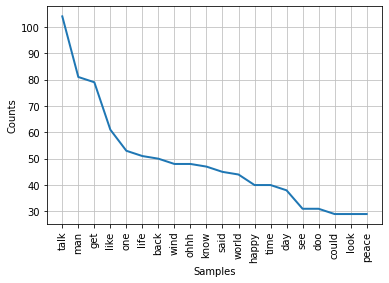

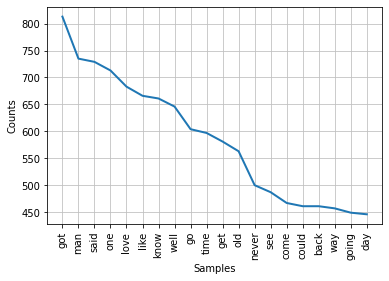

In [140]:
[nltk.FreqDist(stem).plot(20) for stem in artist_bow]

#### Stemmer

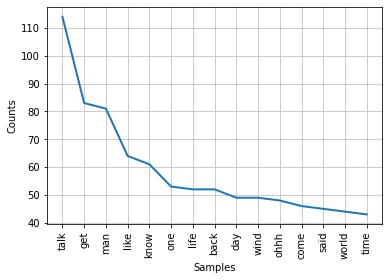

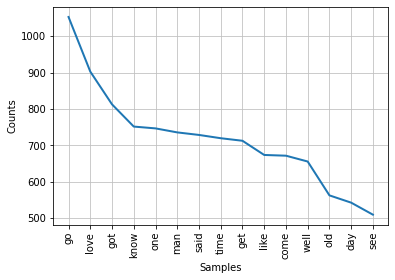

In [123]:
porter = nltk.PorterStemmer()
artist_bow_stem = [[porter.stem(w) for w in bow] for bow in artist_bow]
[nltk.FreqDist(stem).plot(15) for stem in artist_bow_stem]

#### Lexical diversity

In [106]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [107]:
for art,bow in zip(artists, artist_bow):
    print(f"LEXICAL DIVERSITY OF {art}: {lexical_diversity(bow)}")

LEXICAL DIVERSITY OF King Crimson: 0.2819484240687679
LEXICAL DIVERSITY OF Johnny Cash: 0.08869678919075984


#### Text Frequency - Inverse Document Frequency
Perhaps a better idea over songs? Two 'documents' is fair small.

In [108]:
wset = set(artist_bow[0]).union(set(artist_bow[1]))

word_freqs = [dict.fromkeys(wset,0) for i in artist_bow]
for i, wfd in enumerate(word_freqs):
    for word in artist_bow[i]:
        wfd[word] += 1

def TF(word_freq_dict, words):
    tfd = {}
    for word, count in word_freq_dict.items():
        tfd[word] = count / float(len(words))
    return tfd

import math
def IDF(bows):
    N = len(bows)
    
    idfd = dict.fromkeys(bows[0].keys(), 0)
    for bow in bows:
        for word, freq in bow.items():
            if freq > 0:
                idfd[word] += 1
    
    for word, val in idfd.items():
        idfd[word] = math.log(N / float(val))
    return idfd

def TFIDF(tfw, idf):
    tfidf = {}
    for word, freq in tfw.items():
        tfidf[word] = freq * idf[word]
    return tfidf

In [109]:
tfidf = [TFIDF(tf,IDF(word_freqs)) for tf in [TF(wfd, words) for wfd, words in zip(word_freqs,artist_bow)]]
print([max(t.values()) for t in tfidf])

[0.0024627578908147053, 0.0014674044211849986]


#### Bigrams, collocations

In [127]:
from nltk.collocations import *

bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()

bfinders = [BigramCollocationFinder.from_words(bow) for bow in artist_bow]
tfinders = [TrigramCollocationFinder.from_words(bow) for bow in artist_bow]
for finder in bfinders:
    finder.apply_freq_filter(5)
    print(finder.nbest(bigram.pmi, 10))
for finder in tfinders:
    finder.apply_freq_filter(5)
    print(finder.nbest(trigram.pmi, 10))

[('greed', 'poets'), ('innocents', 'raped'), ('poets', 'starving'), ('pyre', 'innocents'), ('schizophrenic', 'tendencies'), ('barbed', 'wire'), ('paranoia', 'poison'), ('raped', 'napalm'), ('wire', 'politicians'), ('prince', 'rupert')]
[('boa', 'constrictor'), ('chandeliers', 'burgundy'), ('redeemer', 'beckoning'), ('sandy', 'scag'), ('patriotic', 'nephew'), ('honky', 'tonk'), ('rick', 'rubin'), ('orange', 'blossom'), ('wondrous', 'waddy'), ('wooly', 'booger')]
[('greed', 'poets', 'starving'), ('pyre', 'innocents', 'raped'), ('barbed', 'wire', 'politicians'), ('innocents', 'raped', 'napalm'), ('many', 'schizophrenic', 'tendencies'), ('funeral', 'pyre', 'innocents'), ('politicians', 'funeral', 'pyre'), ('poets', 'starving', 'children'), ('scream', 'paranoia', 'poison'), ('wire', 'politicians', 'funeral')]
[('crystal', 'chandeliers', 'burgundy'), ('produced', 'rick', 'rubin'), ('waving', 'patriotic', 'nephew'), ('patriotic', 'nephew', 'uncle'), ('orange', 'blossom', 'special'), ('drunken

In [133]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()

bfinders = [BigramCollocationFinder.from_words(bow) for bow in artist_bow_stem]
tfinders = [TrigramCollocationFinder.from_words(bow) for bow in artist_bow_stem]
for finder in bfinders:
    finder.apply_freq_filter(5)
    print(finder.nbest(bigram.pmi, 10))
for finder in tfinders:
    finder.apply_freq_filter(5)
    print(finder.nbest(trigram.pmi, 10))

[('greed', 'poet'), ('poet', 'starv'), ('schizophren', 'tendenc'), ('barb', 'wire'), ('innoc', 'rape'), ('pyre', 'innoc'), ('rape', 'napalm'), ('wire', 'politician'), ('princ', 'rupert'), ('mani', 'schizophren')]
[('boa', 'constrictor'), ('sandi', 'scag'), ('patriot', 'nephew'), ('chandeli', 'burgundi'), ('honki', 'tonk'), ('rick', 'rubin'), ('wondrou', 'waddi'), ('wooli', 'booger'), ('jess', 'jame'), ('didl', 'didli')]
[('greed', 'poet', 'starv'), ('barb', 'wire', 'politician'), ('pyre', 'innoc', 'rape'), ('mani', 'schizophren', 'tendenc'), ('innoc', 'rape', 'napalm'), ('politician', 'funer', 'pyre'), ('poet', 'starv', 'children'), ('funer', 'pyre', 'innoc'), ('wire', 'politician', 'funer'), ('rack', 'barb', 'wire')]
[('crystal', 'chandeli', 'burgundi'), ('produc', 'rick', 'rubin'), ('patriot', 'nephew', 'uncl'), ('wave', 'patriot', 'nephew'), ('orang', 'blossom', 'special'), ('drifter', 'driftin', 'drifter'), ('amen', 'amen', 'amen'), ('drunken', 'ira', 'hay'), ('robert', 'e', 'lee')

### More granular

#### Frequency distribution

In [111]:
porter = nltk.PorterStemmer()
afds_stem = [[nltk.FreqDist([porter.stem(w) for w in song.filtered()]) for song in a.songs] for a in aa] #  Artists' words frequency distributions after stemming
afds = [[nltk.FreqDist(song.filtered()) for song in a.songs] for a in aa] #  Artists' words frequency distributions

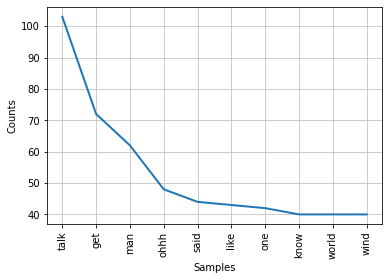

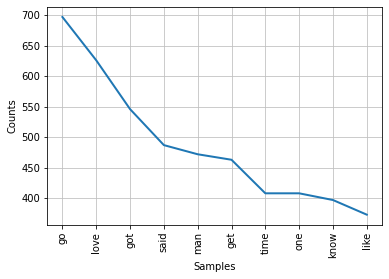

In [118]:
mcs = [[fd.most_common(10) for fd in afd if len(fd) != 0] for afd in afds_stem]
agg_fds = []
#print(mc)
for mc in mcs:
    aggfd = {}
    for tops in mc:
        #print(f"====\n\n\n\n{tops}\n\n\n\n====")
        for w,fq in tops:
            if w not in aggfd:
                aggfd.update({w:fq})
            else:
                aggfd[w] += fq
    agg_fds.append(aggfd)
ff = [nltk.FreqDist() for i in agg_fds]
[f.update(fd) for f,fd in zip(ff,agg_fds)]
for f in ff:
    f.plot(10)

#### Lexical diversity

In [120]:
lexdiv = [[lexical_diversity(song.filtered()) for song in a.songs if len(song.filtered()) > 0] for a in aa]
lexdiv_stem = [[lexical_diversity([porter.stem(w) for w in song.filtered()]) for song in a.songs if len(song.filtered()) > 0] for a in aa]

In [122]:
import statistics as stats
print(f"====>Lexical diversity stats<====")
for a,llex in zip(aa,lexdiv_stem):
    print(f"==>ARTIST: {a.name}")
    print(f">MEAN     {stats.mean(llex)}")
    print(f">SD       {stats.stdev(llex)}")
#    print(f">VARIANCE {stats.variance(llex)}")
    print(f">MEDIAN   {stats.median(llex)}")
    print(f">MIN      {min(llex)}")

====>Lexical diversity stats<====
==>ARTIST: King Crimson
>MEAN     0.7250414949870088
>SD       0.21159505319751798
>MEDIAN   0.7553956834532374
>MIN      0.24
==>ARTIST: Johnny Cash
>MEAN     0.6580141623262034
>SD       0.14278595734025246
>MEDIAN   0.6724137931034483
>MIN      0.2


#### TFIDF for songs

In [15]:
# Word sets per artist
wsets = [set(bow) for bow in artist_bow]
#wset = set(artist_bow[0]).union(set(artist_bow[1]))
#wsets = [set(artist_bow[0]),set(artist_bow[1])]

word_freqs = [dict.fromkeys(ws,0) for ws in wsets]

In [16]:
for wfd, a in zip(word_freqs, aa):
    for song in a.songs:
        for word in song.filtered():
            wfd[word] += 1

In [ ]:
wsets = [set(bow) for bow in artist_bow]

word_freqs = [dict.fromkeys(wset,0) for i in artist_bow]
for i, wfd in enumerate(word_freqs):
    for word in artist_bow[i]:
        wfd[word] += 1

def TF(word_freq_dict, words):
    tfd = {}
    for word, count in word_freq_dict.items():
        tfd[word] = count / float(len(words))
    return tfd

import math
def IDF(bows):
    N = len(bows)
    
    idfd = dict.fromkeys(bows[0].keys(), 0)
    for bow in bows:
        for word, freq in bow.items():
            if freq > 0:
                idfd[word] += 1
    
    for word, val in idfd.items():
        idfd[word] = math.log(N / float(val))
    return idfd

def TFIDF(tfw, idf):
    tfidf = {}
    for word, freq in tfw.items():
        tfidf[word] = freq * idf[word]
    return tfidf

In [17]:
# TODO: why do you crash?
# tfs = []
#for wfd, a in zip(word_freqs, aa):
#    tfa = []
#    for song in a.songs:
#        for word in song.words:
#            tfa.append(TF(wfd, word))
#    tfs.append(tfa)
#tfs = [[[TF(wfd, w) for w in s.words] for s in a.songs] for a in aa]
#TFIDF(tf,IDF(wfd)) for tf in 
# tfs[0][0]

In [18]:
#tfs[0]

In [19]:
#tfidfs = [TFIDF(tf,IDF(wfd)) for tf,wfd in [(TF(wfd, ),wfd) for w in s.words]]
#tfidf = [TFIDF(tf,IDF(word_freqs)) for tf in [TF(wfd, words) for wfd, words in zip(word_freqs,artist_bow)]]
#print([max(t.values()) for t in tfidf])

In [20]:
for wfd, a in zip(word_freqs, aa):
    print(len(wfd))

2460
8547


In [21]:
len(word_freqs)

2

In [22]:
# import nltk
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# #stop_words.extend(["get"])
# punctuation = [",",".",";","'","-","I","\"","!","--",".\"","?","'s", "''", "..."]
# from bs4 import BeautifulSoup
# import requests
# import re

# from abc import ABC, abstractmethod

# artist_names = ["King Crimson", "Cash"]

# class LyricsURL(ABC):
    
#     @abstractmethod
#     def artist(self, name):
#         pass
    
#     @abstractmethod
#     def song(self, title):
#         pass

# class AZLyricsURL(LyricsURL):
#     def __init__(self):
#         self.__base = "https://www.azlyrics.com"
#         super().__init__()
    
#     def artist(self, name):
#         name = self.fmt(name)
#         return "".join(f"{self.__base}/{name[0]}/{name}.html")
    
#     def song(self, artist, title):
#         artist = self.fmt(artist)
#         title = self.fmt(title)
#         return "".join(f"{self.__base}/lyrics/{artist}/{title}.html")
    
#     def fmt(self, s):
#         return "".join([c.lower() for c in s if c.isalnum()])

# import requests

# url = "https://genius.p.rapidapi.com/artists/14986/songs"

# headers = {
#     'x-rapidapi-host': "genius.p.rapidapi.com",
#     'x-rapidapi-key': "8c62b01aa3msh79ca17d82d4e5dep1a3ddejsn9346cf9aa3cb"
#     }

# stepsize = 50
# page = 1

# response = requests.request("GET", url, headers=headers, params={"sort":"title","per_page":str(stepsize),"page":str(page)})
# song_page = response.json()['response']['songs']
# songs = song_page
# while len(song_page) == stepsize:
#     response = requests.request("GET", url, headers=headers, params={"sort":"title","per_page":str(stepsize),"page":str(page)})
#     song_page = response.json()['response']['songs']
#     songs.extend(song_page)
#     page = page+1
# print(f"Retrieved {len(songs)} songs")

# for i in songs:
#     if i['primary_artist']['id'] == 14986 and i['lyrics_state'] == 'complete':
#         print(f"SONG: {i['title']} / {i['url']}")
# for s in songs:
#     if s['primary_artist']['name'] == 'King Crimson':
#         path = Path(f"{s['primary_artist']['name']}_{s['title'].replace('/','')}.song")
#         if not path.is_file():
#             print(f"WRITING LYRICS [ {s['primary_artist']['name']} / {s['title']} ] to `{path}'")

#             soup = BeautifulSoup(requests.get(s['url']).content, 'html.parser')
#             lyrics_tag = soup.find('div', class_='lyrics')
#             if lyrics_tag is not None:
#                 lyrics = lyrics_tag.get_text()

#                 f = open(path, "w")
#                 f.write(lyrics)
#                 f.close()

Retrieved 214 songs
SONG: 21st Century Schizoid Man / https://genius.com/King-crimson-21st-century-schizoid-man-lyrics
SONG: 21st Century Schizoid Man (BBC session) / https://genius.com/King-crimson-21st-century-schizoid-man-bbc-session-lyrics
SONG: 21st Century Schizoid Man - Commentary / https://genius.com/King-crimson-21st-century-schizoid-man-commentary-lyrics
SONG: 21st Century Schizoid Man (Fillmore East) / https://genius.com/King-crimson-21st-century-schizoid-man-fillmore-east-lyrics
SONG: 21st Century Schizoid Man (Hyde Park) / https://genius.com/King-crimson-21st-century-schizoid-man-hyde-park-lyrics
SONG: 21st Century Schizoid Man (Radio Edit) / https://genius.com/King-crimson-21st-century-schizoid-man-radio-edit-lyrics
SONG: Ahriman’s Ceaseless Corruptions / https://genius.com/King-crimson-ahrimans-ceaseless-corruptions-lyrics
SONG: Asbury Park / https://genius.com/King-crimson-asbury-park-lyrics
SONG: Banshee Legs Bell Hassle / https://genius.com/King-crimson-banshee-legs-b

WRITING LYRICS [ King Crimson / 21st Century Schizoid Man (BBC session) ] to `King Crimson_21st Century Schizoid Man (BBC session).song'
WRITING LYRICS [ King Crimson / 21st Century Schizoid Man - Commentary ] to `King Crimson_21st Century Schizoid Man - Commentary.song'
WRITING LYRICS [ King Crimson / 21st Century Schizoid Man (Fillmore East) ] to `King Crimson_21st Century Schizoid Man (Fillmore East).song'
WRITING LYRICS [ King Crimson / 21st Century Schizoid Man (Hyde Park) ] to `King Crimson_21st Century Schizoid Man (Hyde Park).song'
WRITING LYRICS [ King Crimson / 21st Century Schizoid Man (Radio Edit) ] to `King Crimson_21st Century Schizoid Man (Radio Edit).song'
WRITING LYRICS [ King Crimson / Ahriman’s Ceaseless Corruptions ] to `King Crimson_Ahriman’s Ceaseless Corruptions.song'
WRITING LYRICS [ King Crimson / Asbury Park ] to `King Crimson_Asbury Park.song'
WRITING LYRICS [ King Crimson / Banshee Legs Bell Hassle ] to `King Crimson_Banshee Legs Bell Hassle.song'
WRITING LY

WRITING LYRICS [ King Crimson / Moonchild ] to `King Crimson_Moonchild.song'
WRITING LYRICS [ King Crimson / Neal and Jack and Me ] to `King Crimson_Neal and Jack and Me.song'
WRITING LYRICS [ King Crimson / Neurotica ] to `King Crimson_Neurotica.song'
WRITING LYRICS [ King Crimson / No Warning ] to `King Crimson_No Warning.song'
WRITING LYRICS [ King Crimson / Nuages (That Which Passes, Passes Like Clouds) ] to `King Crimson_Nuages (That Which Passes, Passes Like Clouds).song'
WRITING LYRICS [ King Crimson / One More Red Nightmare ] to `King Crimson_One More Red Nightmare.song'
WRITING LYRICS [ King Crimson / One Time ] to `King Crimson_One Time.song'
WRITING LYRICS [ King Crimson / Peace ] to `King Crimson_Peace.song'
WRITING LYRICS [ King Crimson / Peace - A Beginning ] to `King Crimson_Peace - A Beginning.song'
WRITING LYRICS [ King Crimson / Peace – An End ] to `King Crimson_Peace – An End.song'
WRITING LYRICS [ King Crimson / Peace - A Theme ] to `King Crimson_Peace - A Theme.son